In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [546]:
data = pd.read_csv('dataset.csv')

In [547]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14


In [548]:
data.shape

(250, 10)

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          250 non-null    object 
 1   Category            250 non-null    object 
 2   Supplier            250 non-null    object 
 3   Warehouse_Location  250 non-null    object 
 4   Order_Date          250 non-null    object 
 5   Delivery_Date       250 non-null    object 
 6   Inventory_Level     250 non-null    int64  
 7   Stockouts           250 non-null    int64  
 8   Unit_Cost           250 non-null    float64
 9   Lead_Time           250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


In [550]:
data.describe()

,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
count,250.000000,250.000000,250.000000,250.0000
mean,256.348000,0.188000,247.996080,10.0000
std,138.852392,0.391496,138.993919,5.0785
min,1.000000,0.000000,5.570000,1.0000
25%,149.000000,0.000000,126.965000,6.0000
50%,268.000000,0.000000,247.265000,10.0000
75%,373.750000,0.000000,377.477500,14.0000
max,499.000000,1.000000,493.750000,19.0000


In [551]:
data.isnull().sum()

Product_ID            0
Category              0
Supplier              0
Warehouse_Location    0
Order_Date            0
Delivery_Date         0
Inventory_Level       0
Stockouts             0
Unit_Cost             0
Lead_Time             0
dtype: int64

In [552]:
data.duplicated().sum()

np.int64(0)

In [553]:
data.value_counts()

Product_ID  Category     Supplier    Warehouse_Location  Order_Date  Delivery_Date  Inventory_Level  Stockouts  Unit_Cost  Lead_Time
P0001       Toys         Supplier B  Chicago             2025-02-23  2025-03-01     15               0          446.20     6            1
P0002       Furniture    Supplier C  San Francisco       2025-02-25  2025-03-15     138              0          208.02     18           1
P0003       Furniture    Supplier B  Chicago             2025-01-22  2025-02-08     270              0          423.75     14           1
P0004       Toys         Supplier D  Chicago             2025-01-29  2025-02-06     151              0          123.17     8            1
P0005       Food         Supplier A  Dallas              2025-03-10  2025-03-24     237              1          462.93     14           1
P0006       Clothing     Supplier D  New York            2025-02-20  2025-03-13     223              0          407.72     17           1
P0007       Furniture    Supplier D  Ne

In [554]:
data.nunique()

Product_ID            250
Category                5
Supplier                4
Warehouse_Location      4
Order_Date             79
Delivery_Date          80
Inventory_Level       200
Stockouts               2
Unit_Cost             250
Lead_Time              19
dtype: int64

# Mean time lead by Supplier

In [555]:
data_supply_lead = data.groupby('Supplier')['Lead_Time'].mean().round(2)
data_supply_lead

Supplier
Supplier A    10.67
Supplier B     9.02
Supplier C     9.60
Supplier D    10.82
Name: Lead_Time, dtype: float64

# Mean time Lead

In [556]:
data_supply_lead.mean()

np.float64(10.0275)

In [557]:
data['Lead_Time']

0       6
1      18
2      14
3       8
4      14
5      17
6      17
7       5
8       6
9      18
10      7
11     14
12      6
13      8
14     13
15     13
16      4
17      4
18     11
19      2
20     14
21     11
22     14
23      7
24      5
25     13
26     13
27      7
28      6
29     14
30     13
31      9
32      7
33     17
34      7
35      6
36      6
37      3
38      9
39     11
40      4
41     10
42      6
43      3
44     12
45     17
46      8
47     16
48     10
49      5
50      4
51     19
52     14
53     16
54      1
55     18
56      6
57      9
58      7
59     14
60      5
61      6
62      3
63     15
64     18
65      1
66     16
67     16
68      8
69     17
70     12
71     12
72      5
73      9
74     13
75     14
76     15
77     13
78     10
79      8
80     14
81      8
82      6
83      3
84     19
85     14
86     18
87     14
88     17
89     15
90     12
91     13
92     11
93      5
94     10
95      2
96     19
97      7
98      9
99     14


# It Filters only the ones with late deliveries Lead_Time > 10

In [558]:
data_late_deliveries = data[data['Lead_Time']>10.02]
data_late_deliveries

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14
5,P0006,Clothing,Supplier D,New York,2025-02-20,2025-03-13,223,0,407.72,17
6,P0007,Furniture,Supplier D,New York,2025-02-17,2025-03-06,248,0,128.05,17
9,P0010,Food,Supplier A,San Francisco,2025-03-04,2025-03-22,270,0,16.85,18
11,P0012,Toys,Supplier A,Chicago,2025-01-31,2025-02-14,134,0,5.57,14
14,P0015,Food,Supplier A,New York,2025-01-30,2025-02-12,174,0,213.44,13
15,P0016,Furniture,Supplier B,San Francisco,2025-03-23,2025-04-05,346,0,476.24,13
18,P0019,Food,Supplier C,San Francisco,2025-04-02,2025-04-13,380,0,127.26,11


# late delivery lead in days


In [559]:
data_late_category = data_late_deliveries.groupby('Category')['Lead_Time'].mean()
data_late_category


Category
Clothing       14.074074
Electronics    14.681818
Food           15.360000
Furniture      14.304348
Toys           14.285714
Name: Lead_Time, dtype: float64

# Category late deliveries lead percentage

In [560]:
data_late_category_perc = (data_late_category * 100)/data_late_category.sum()

data_late_category_perc.round(2)

Category
Clothing       19.36
Electronics    20.19
Food           21.13
Furniture      19.67
Toys           19.65
Name: Lead_Time, dtype: float64

# Stockout frequency


In [561]:
stockout_frequency_warehouse = data.groupby('Warehouse_Location')['Stockouts'].sum()
stockout_frequency_warehouse

Warehouse_Location
Chicago           7
Dallas           15
New York         11
San Francisco    14
Name: Stockouts, dtype: int64

In [562]:
data['Warehouse_Location'].unique()

array(['Chicago', 'San Francisco', 'Dallas', 'New York'], dtype=object)

# Average Daily Usage per item

In [563]:
data['Average_Daily_Usage'] = (data['Inventory_Level'] / data['Lead_Time']).round(2)
data['Average_Daily_Usage']

0        2.50
1        7.67
2       19.29
3       18.88
4       16.93
5       13.12
6       14.59
7       83.00
8       24.83
9       15.00
10      12.57
11       9.57
12      14.33
13       1.00
14      13.38
15      26.62
16      77.25
17      95.50
18      34.55
19      97.00
20      21.21
21      32.64
22       8.79
23      21.57
24      48.40
25       7.54
26      27.62
27       3.86
28       3.33
29      13.71
30       6.54
31      24.33
32      58.57
33      22.71
34      15.14
35      78.50
36       8.67
37     108.00
38      13.11
39      10.55
40      10.00
41      24.10
42      50.33
43       9.67
44      12.67
45      21.41
46      55.62
47      14.62
48      43.20
49      88.40
50     101.00
51      16.32
52       1.07
53      29.69
54     303.00
55      20.83
56      36.17
57      43.78
58      46.43
59      29.50
60      37.20
61      28.67
62      67.33
63       8.40
64      19.78
65     349.00
66       6.81
67      14.75
68      43.75
69      24.82
70      28.17
71    

In [564]:
# Lead Safety Stock in days

In [565]:
data['Lead_Safety_Stock'] = data['Lead_Time'].apply(lambda x: x-10 if x >10 else  0)
data['Lead_Safety_Stock']

0      0
1      8
2      4
3      0
4      4
5      7
6      7
7      0
8      0
9      8
10     0
11     4
12     0
13     0
14     3
15     3
16     0
17     0
18     1
19     0
20     4
21     1
22     4
23     0
24     0
25     3
26     3
27     0
28     0
29     4
30     3
31     0
32     0
33     7
34     0
35     0
36     0
37     0
38     0
39     1
40     0
41     0
42     0
43     0
44     2
45     7
46     0
47     6
48     0
49     0
50     0
51     9
52     4
53     6
54     0
55     8
56     0
57     0
58     0
59     4
60     0
61     0
62     0
63     5
64     8
65     0
66     6
67     6
68     0
69     7
70     2
71     2
72     0
73     0
74     3
75     4
76     5
77     3
78     0
79     0
80     4
81     0
82     0
83     0
84     9
85     4
86     8
87     4
88     7
89     5
90     2
91     3
92     1
93     0
94     0
95     0
96     9
97     0
98     0
99     4
100    4
101    6
102    2
103    3
104    0
105    0
106    8
107    0
108    9
109    3
110    0
1

In [566]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2.50,0
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,7.67,8
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14,19.29,4
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,18.88,0
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,16.93,4


# Safety Stock

In [567]:
data['Safety_Stock'] = data['Average_Daily_Usage']* data['Lead_Safety_Stock']
data['Safety_Stock']

0        0.00
1       61.36
2       77.16
3        0.00
4       67.72
5       91.84
6      102.13
7        0.00
8        0.00
9      120.00
10       0.00
11      38.28
12       0.00
13       0.00
14      40.14
15      79.86
16       0.00
17       0.00
18      34.55
19       0.00
20      84.84
21      32.64
22      35.16
23       0.00
24       0.00
25      22.62
26      82.86
27       0.00
28       0.00
29      54.84
30      19.62
31       0.00
32       0.00
33     158.97
34       0.00
35       0.00
36       0.00
37       0.00
38       0.00
39      10.55
40       0.00
41       0.00
42       0.00
43       0.00
44      25.34
45     149.87
46       0.00
47      87.72
48       0.00
49       0.00
50       0.00
51     146.88
52       4.28
53     178.14
54       0.00
55     166.64
56       0.00
57       0.00
58       0.00
59     118.00
60       0.00
61       0.00
62       0.00
63      42.00
64     158.24
65       0.00
66      40.86
67      88.50
68       0.00
69     173.74
70      56.34
71    

# Reorder Point (ROP):

In [568]:
data['Rop'] = (data['Average_Daily_Usage'] * data['Lead_Time']) + data['Lead_Safety_Stock']
data['Rop']

0       15.00
1      146.06
2      274.06
3      151.04
4      241.02
5      230.04
6      255.03
7      415.00
8      148.98
9      278.00
10      87.99
11     137.98
12      85.98
13       8.00
14     176.94
15     349.06
16     309.00
17     382.00
18     381.05
19     194.00
20     300.94
21     360.04
22     127.06
23     150.99
24     242.00
25     101.02
26     362.06
27      27.02
28      19.98
29     195.94
30      88.02
31     218.97
32     409.99
33     393.07
34     105.98
35     471.00
36      52.02
37     324.00
38     117.99
39     117.05
40      40.00
41     241.00
42     301.98
43      29.01
44     154.04
45     370.97
46     444.96
47     239.92
48     432.00
49     442.00
50     404.00
51     319.08
52      18.98
53     481.04
54     303.00
55     382.94
56     217.02
57     394.02
58     325.01
59     417.00
60     186.00
61     172.02
62     201.99
63     131.00
64     364.04
65     349.00
66     114.96
67     242.00
68     350.00
69     428.94
70     340.04
71    

In [569]:
data_supplier_late = data_late_deliveries.groupby('Supplier')['Lead_Time'].mean()
data_supplier_late


Supplier
Supplier A    14.454545
Supplier B    14.074074
Supplier C    14.769231
Supplier D    14.843750
Name: Lead_Time, dtype: float64

# Identify top 5 suppliers with highest late delivery rates

In [570]:
data_supplier_late_perc= (data_supplier_late*100)/data_supplier_late.sum()
data_supplier_late_perc

Supplier
Supplier A    24.860935
Supplier B    24.206547
Supplier C    25.402175
Supplier D    25.530343
Name: Lead_Time, dtype: float64

# Cost Saving by reducing 10%

In [571]:
data['Cost_Savings'] = data['Average_Daily_Usage'].round(2) * (data['Lead_Time'] - (data['Lead_Time'] * 0.1).round(2))
data['Cost_Savings']

0       13.500
1      124.254
2      243.054
3      135.936
4      213.318
5      200.736
6      223.227
7      373.500
8      134.082
9      243.000
10      79.191
11     120.582
12      77.382
13       7.200
14     156.546
15     311.454
16     278.100
17     343.800
18     342.045
19     174.600
20     267.246
21     323.136
22     110.754
23     135.891
24     217.800
25      88.218
26     323.154
27      24.318
28      17.982
29     172.746
30      76.518
31     197.073
32     368.991
33     347.463
34      95.382
35     423.900
36      46.818
37     291.600
38     106.191
39     104.445
40      36.000
41     216.900
42     271.782
43      26.109
44     136.836
45     327.573
46     400.464
47     210.528
48     388.800
49     397.800
50     363.600
51     279.072
52      13.482
53     427.536
54     272.700
55     337.446
56     195.318
57     354.618
58     292.509
59     371.700
60     167.400
61     154.818
62     181.791
63     113.400
64     320.436
65     314.100
66      98

In [572]:
data['Cost_Saving_Value'] = data['Cost_Savings'] * data['Unit_Cost']
data['Cost_Saving_Value'].round(2)

0        6023.70
1       25847.32
2      102994.13
3       16743.24
4       98751.30
5       81844.08
6       28584.22
7      143506.17
8       42583.10
9        4094.55
10      30628.70
11        671.64
12      10684.91
13       1223.06
14      33413.18
15     148326.85
16     109496.31
17     143969.69
18      43528.65
19      37542.49
20      66031.14
21       7693.87
22      15802.38
23      63039.83
24     100340.46
25      23893.85
26      46938.12
27      10872.82
28       4228.65
29      54447.81
30      33185.86
31      86000.69
32      29039.59
33      30597.59
34       9534.38
35     172777.40
36      13088.91
37      20079.58
38       4591.70
39      15207.19
40       9462.96
41      57608.64
42      62007.06
43      10524.02
44      14080.42
45     103827.54
46      21560.98
47      92918.64
48     154839.60
49     130844.38
50      37919.84
51      54991.14
52       1185.74
53      50855.41
54      62491.93
55     125938.22
56      42809.80
57      66806.49
58      67739.

In [573]:
data['Total_Cost'] = data['Cost_Saving_Value'].sum()
data['Total_Cost'].round(2).unique()

array([14481980.07])

In [574]:
data.head(5).round(2)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock,Safety_Stock,Rop,Cost_Savings,Cost_Saving_Value,Total_Cost
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2.50,0,0.00,15.00,13.50,6023.70,14481980.07
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,7.67,8,61.36,146.06,124.25,25847.32,14481980.07
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14,19.29,4,77.16,274.06,243.05,102994.13,14481980.07
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,18.88,0,0.00,151.04,135.94,16743.24,14481980.07
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,16.93,4,67.72,241.02,213.32,98751.30,14481980.07


In [575]:
data_efficiency_supplier = data.groupby('Supplier')['Lead_Safety_Stock'].sum()
data_efficiency_supplier

Supplier
Supplier A    147
Supplier B    110
Supplier C    124
Supplier D    155
Name: Lead_Safety_Stock, dtype: int64

# Delivery performance by supplier

<function matplotlib.pyplot.show(close=None, block=None)>

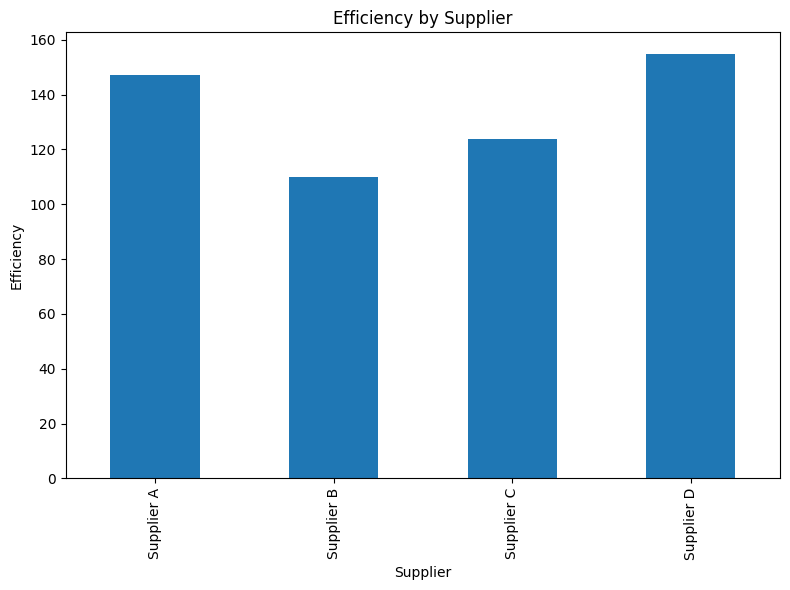

In [576]:
plt.figure(figsize=(8,6))
data_efficiency_supplier.plot(kind = 'bar' )
plt.title('Efficiency by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Efficiency')
plt.tight_layout()
plt.show

# Inventory levels vs. reorder points

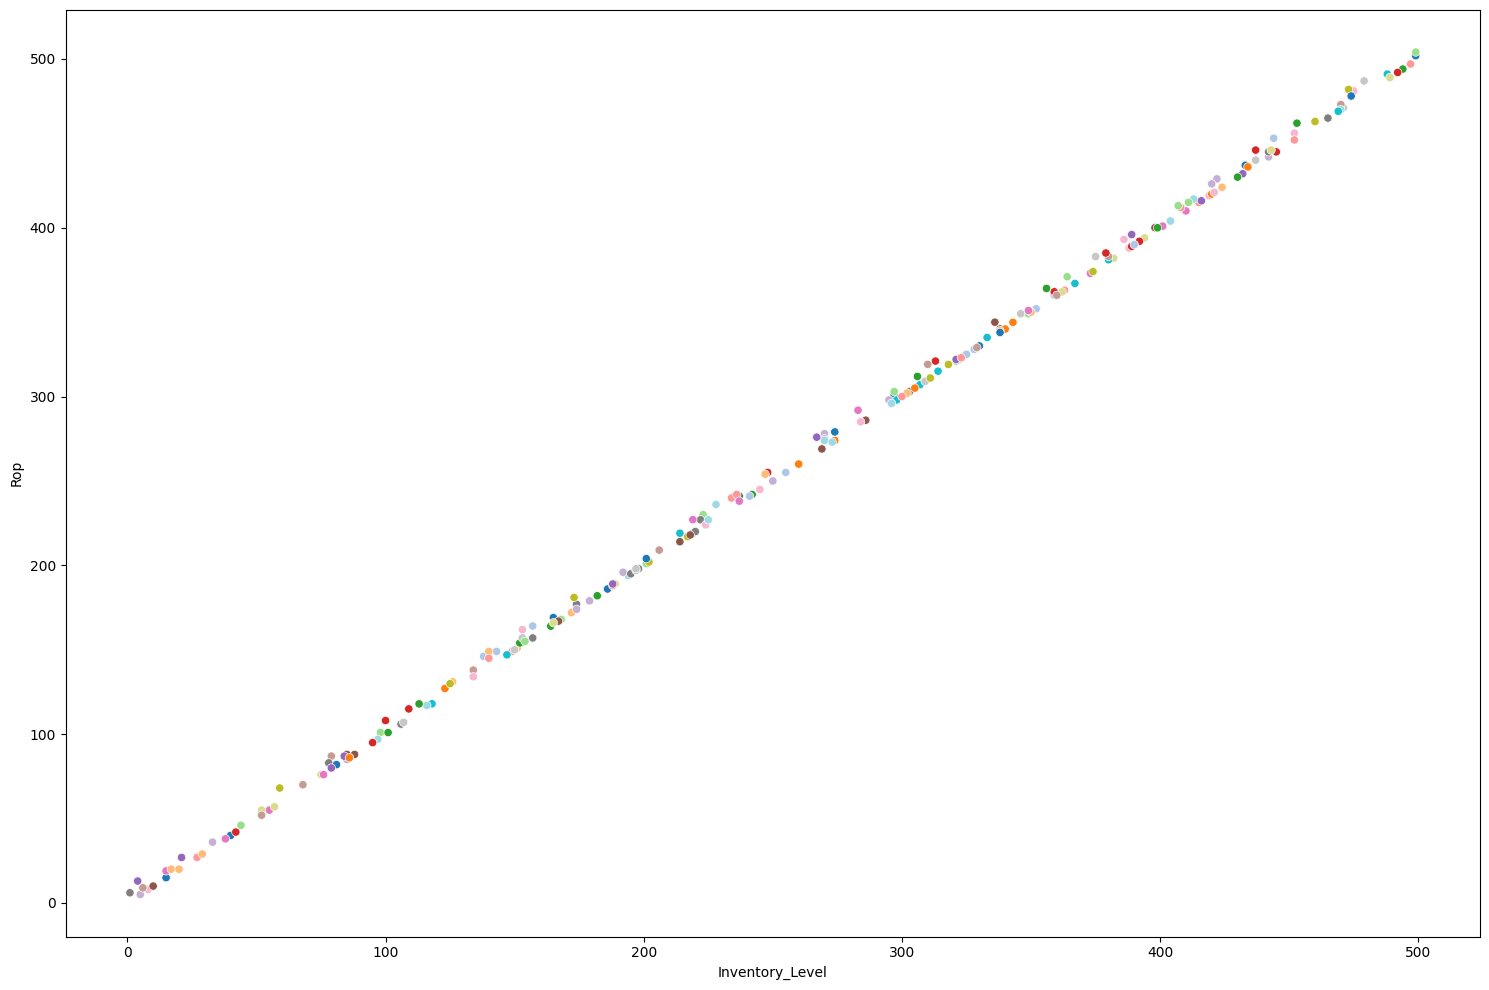

In [577]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = data, x = 'Inventory_Level', y = 'Rop', hue = 'Product_ID', palette = 'tab20', legend=False)
plt.tight_layout()
plt.show()

In [578]:
pd.set_option('display.max_rows', None)

data['Stockouts']

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     1
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     1
42     0
43     1
44     1
45     0
46     0
47     0
48     1
49     0
50     1
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     1
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     1
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
110    0
1

In [579]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock,Safety_Stock,Rop,Cost_Savings,Cost_Saving_Value,Total_Cost
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2.50,0,0.00,15.00,13.500,6023.70000,1.448198e+07
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,7.67,8,61.36,146.06,124.254,25847.31708,1.448198e+07
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14,19.29,4,77.16,274.06,243.054,102994.13250,1.448198e+07
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,18.88,0,0.00,151.04,135.936,16743.23712,1.448198e+07
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,16.93,4,67.72,241.02,213.318,98751.30174,1.448198e+07


In [580]:
data_ML_Stockout = data.drop(columns=['Product_ID', 'Category', 'Supplier', 'Warehouse_Location', 'Order_Date', 'Delivery_Date', 'Unit_Cost', 'Cost_Savings', 'Cost_Saving_Value', 'Total_Cost'])
data_ML_Stockout.head(5)


,Inventory_Level,Stockouts,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock,Safety_Stock,Rop
0,15,0,6,2.50,0,0.00,15.00
1,138,0,18,7.67,8,61.36,146.06
2,270,0,14,19.29,4,77.16,274.06
3,151,0,8,18.88,0,0.00,151.04
4,237,1,14,16.93,4,67.72,241.02


In [581]:
X = data_ML_Stockout.drop(columns=['Stockouts'])
y = data_ML_Stockout['Stockouts']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)

In [593]:
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [594]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1])

In [584]:
accuracy_score(y_test, y_pred)

0.44

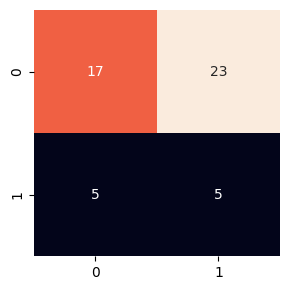

In [585]:
supply_cm = confusion_matrix(y_test, y_pred)
cm_data = pd.DataFrame(supply_cm)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_data, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

# Hyperparameter optimization process
# Grid search

In [586]:
hyperparams = {
    "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

model = LogisticRegression(max_iter=1000, class_weight='balanced')
grid = GridSearchCV(model, hyperparams, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
grid

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_l

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [587]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_l

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [588]:
model_grid = LogisticRegression(penalty = "l2", C = 0.001, solver = "saga")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8

# Random search

In [589]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=1000),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [590]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.0006951927961775605)}


In [591]:
model_random_search = LogisticRegression(penalty = "l1", C = 0.0006951927961775605, solver = "liblinear")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8